## **Image Classification on CIFAR10 using CNN.ipynb**

# **Data Exploration**

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
y_train.shape


(50000, 1)

In [10]:
y_test.shape

(10000, 1)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [16]:
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [17]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

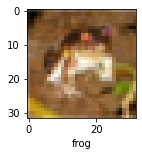

In [18]:
plot_sample(X_train, y_train, 0)

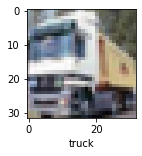

In [19]:
plot_sample(X_train, y_train, 1)

In [20]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

# **Data Normalization**

In [21]:
X_train=X_train/255
X_test=X_test/255

In [22]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [23]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.8111 - accuracy: 0.3573
Epoch 2/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.6229 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.5421 - accuracy: 0.4577
Epoch 4/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4807 - accuracy: 0.4788
Epoch 5/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.4306 - accuracy: 0.4969


In [24]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 7s 22ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.56      0.55      1000
           1       0.60      0.66      0.63      1000
           2       0.38      0.36      0.37      1000
           3       0.34      0.46      0.39      1000
           4       0.51      0.28      0.36      1000
           5       0.46      0.28      0.35      1000
           6       0.47      0.65      0.55      1000
           7       0.58      0.51      0.55      1000
           8       0.53      0.71      0.61      1000
           9       0.62      0.47      0.54      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.50      0.50      0.49     10000



# **Building a CNN**

In [25]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [26]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 53s 33ms/step - loss: 1.4848 - accuracy: 0.4624
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1003 - accuracy: 0.6137
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9666 - accuracy: 0.6640
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8838 - accuracy: 0.6918
Epoch 5/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8131 - accuracy: 0.7185
Epoch 6/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7582 - accuracy: 0.7367
Epoch 7/10
1563/1563 [==============================] - 52s 34ms/step - loss: 0.7086 - accuracy: 0.7521
Epoch 8/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.6668 - accuracy: 0.7673
Epoch 9/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.6245 - accuracy: 0.7823
Epoch 10/10
1563/1563 [==============================] - 53s 34m

In [28]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9339 - accuracy: 0.6976


[0.9339153170585632, 0.6976000070571899]

In [30]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 13ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.77      0.72      1000
           1       0.88      0.75      0.81      1000
           2       0.66      0.55      0.60      1000
           3       0.49      0.60      0.54      1000
           4       0.65      0.67      0.66      1000
           5       0.64      0.54      0.58      1000
           6       0.89      0.65      0.75      1000
           7       0.72      0.78      0.75      1000
           8       0.72      0.85      0.78      1000
           9       0.75      0.82      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

